<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Mini Project

**Building an End-to-End Supervised Learning Project**

- Key Steps:

  - Define the problem

    - Identify the Objective: Regression or Classification

  - Data Preparation

    - Exploratory Data Analysis(EDA)

      - Understand the structure of the dataset

      - Visualize data distributions and Relationships

    - Preprocessing

      - Hand missing values

      - Scale features for algorithms like k-NN

      - Encode categorical variables

  - Model Selection

    - Choose appropriate models based on the problem

  - Model Evaluation

    - Use perfomance metrics like Mean Squared Error(MSE) for regression or Accuracy, Precision, Recall, and F1 Score classification

  - Comparison

    - Compare multiple models to identify the best-performing one

**Applying Regression and Classification Models on a Real-World Dataset**

- Dataset Options

  - Regression Example

    - Predict house prices using features like square footage, number of rooms, and location

    - Dataset: California Housing Dataset or any housing dataset

  - Classification Example

    - Classify customer churn based on customer demographics and behaviour

    - Dataset: Telco Customer churn dataset

**Evaluating and Comparing Model Perfomance**

- Steps

  1. Evaluate models using cross-validation

  2. Generate perfomance metrics

  3. Summarize findings to identify strengths and weakness of each model

**Hands on Project**

- Mini Project: Building a Supervised Learning Model

- Tasks

  - Task 1: Perform Exploratory Data Analysis and preprocessing

  - Task 2: Train and Evaluate Multiple Models

  - Task 3: Summarize Findings in a Report

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving churns.txt to churns (1).txt


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.52      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



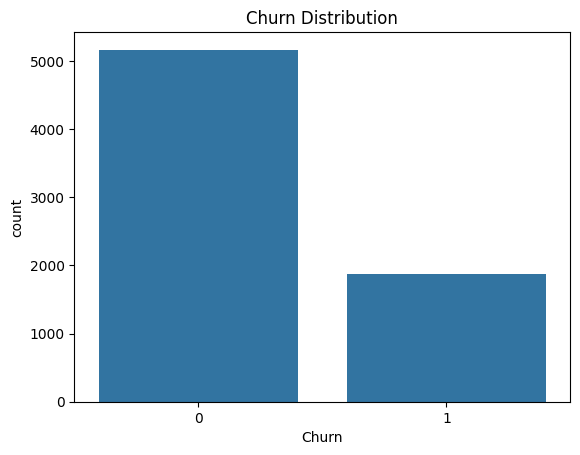

In [32]:
df = pd.read_csv('churns (1).txt')
df.head()

# Handle 'TotalCharges' column: convert to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop rows where 'TotalCharges' became NaN (these are typically empty strings)
df.dropna(inplace=True)

# Drop 'customerID' as it's an identifier and not a feature
df = df.drop(columns=['customerID'])

# Encode the target variable 'Churn'
label_encoder = LabelEncoder()
df["Churn"] = label_encoder.fit_transform(df["Churn"])

# Define Features (X) and Target (y)
X = df.drop(columns = ["Churn"])
y = df["Churn"]

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter = 200)
log_model.fit(X_train, y_train)

# Train k-NN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate models
log_preds = log_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_preds))

print("k-NN Classification Report:")
print(classification_report(y_test, knn_preds))

# Visualize Churn Distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()